In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import umap
import umap.plot
from umap.umap_ import nearest_neighbors

c:\Users\jacob\anaconda3\envs\test\Lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\Users\jacob\anaconda3\envs\test\Lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\Users\jacob\anaconda3\envs\test\Lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.Num

In [3]:
from sklearn.datasets import fetch_openml
import numpy as np
import umap
import umap.plot
from umap.umap_ import nearest_neighbors

data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)


n_neighbors = [5, 50, 100, 250]
min_dists = [0, 0.2, 0.5, 0.9]
normal_embeddings = np.zeros((4, 4, 5000, 2))
precomputed_knn_embeddings = np.zeros((4, 4, 5000, 2))


In [4]:
precomputed_knn_embeddings

array([[[[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.]

In [17]:
data = data.iloc[:5000]
data


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
labels = labels.iloc[:5000]


In [19]:

labels = np.asarray(labels, dtype=np.int32)

In [20]:
labels

array([5, 0, 4, ..., 2, 1, 2])

In [21]:
mnist_knn = nearest_neighbors(data,
                              n_neighbors=250,
                              metric="euclidean",
                              metric_kwds=None,
                              angular=False,
                              random_state=None,
                             )
# Now we compute the embeddings for the grid of parameters
for i, k in enumerate(n_neighbors):
    for j, dist in enumerate(min_dists):
        precomputed_knn_embeddings[i, j] = umap.UMAP(n_neighbors=k,
                                                      min_dist=dist,
                                                      precomputed_knn=mnist_knn,
                                                      ).fit_transform(data)
print("\033[1m"+"Time taken to compute UMAP on grid of parameters with precomputed_knn:\033[0m")

Time taken to compute UMAP on grid of parameters with precomputed_knn:


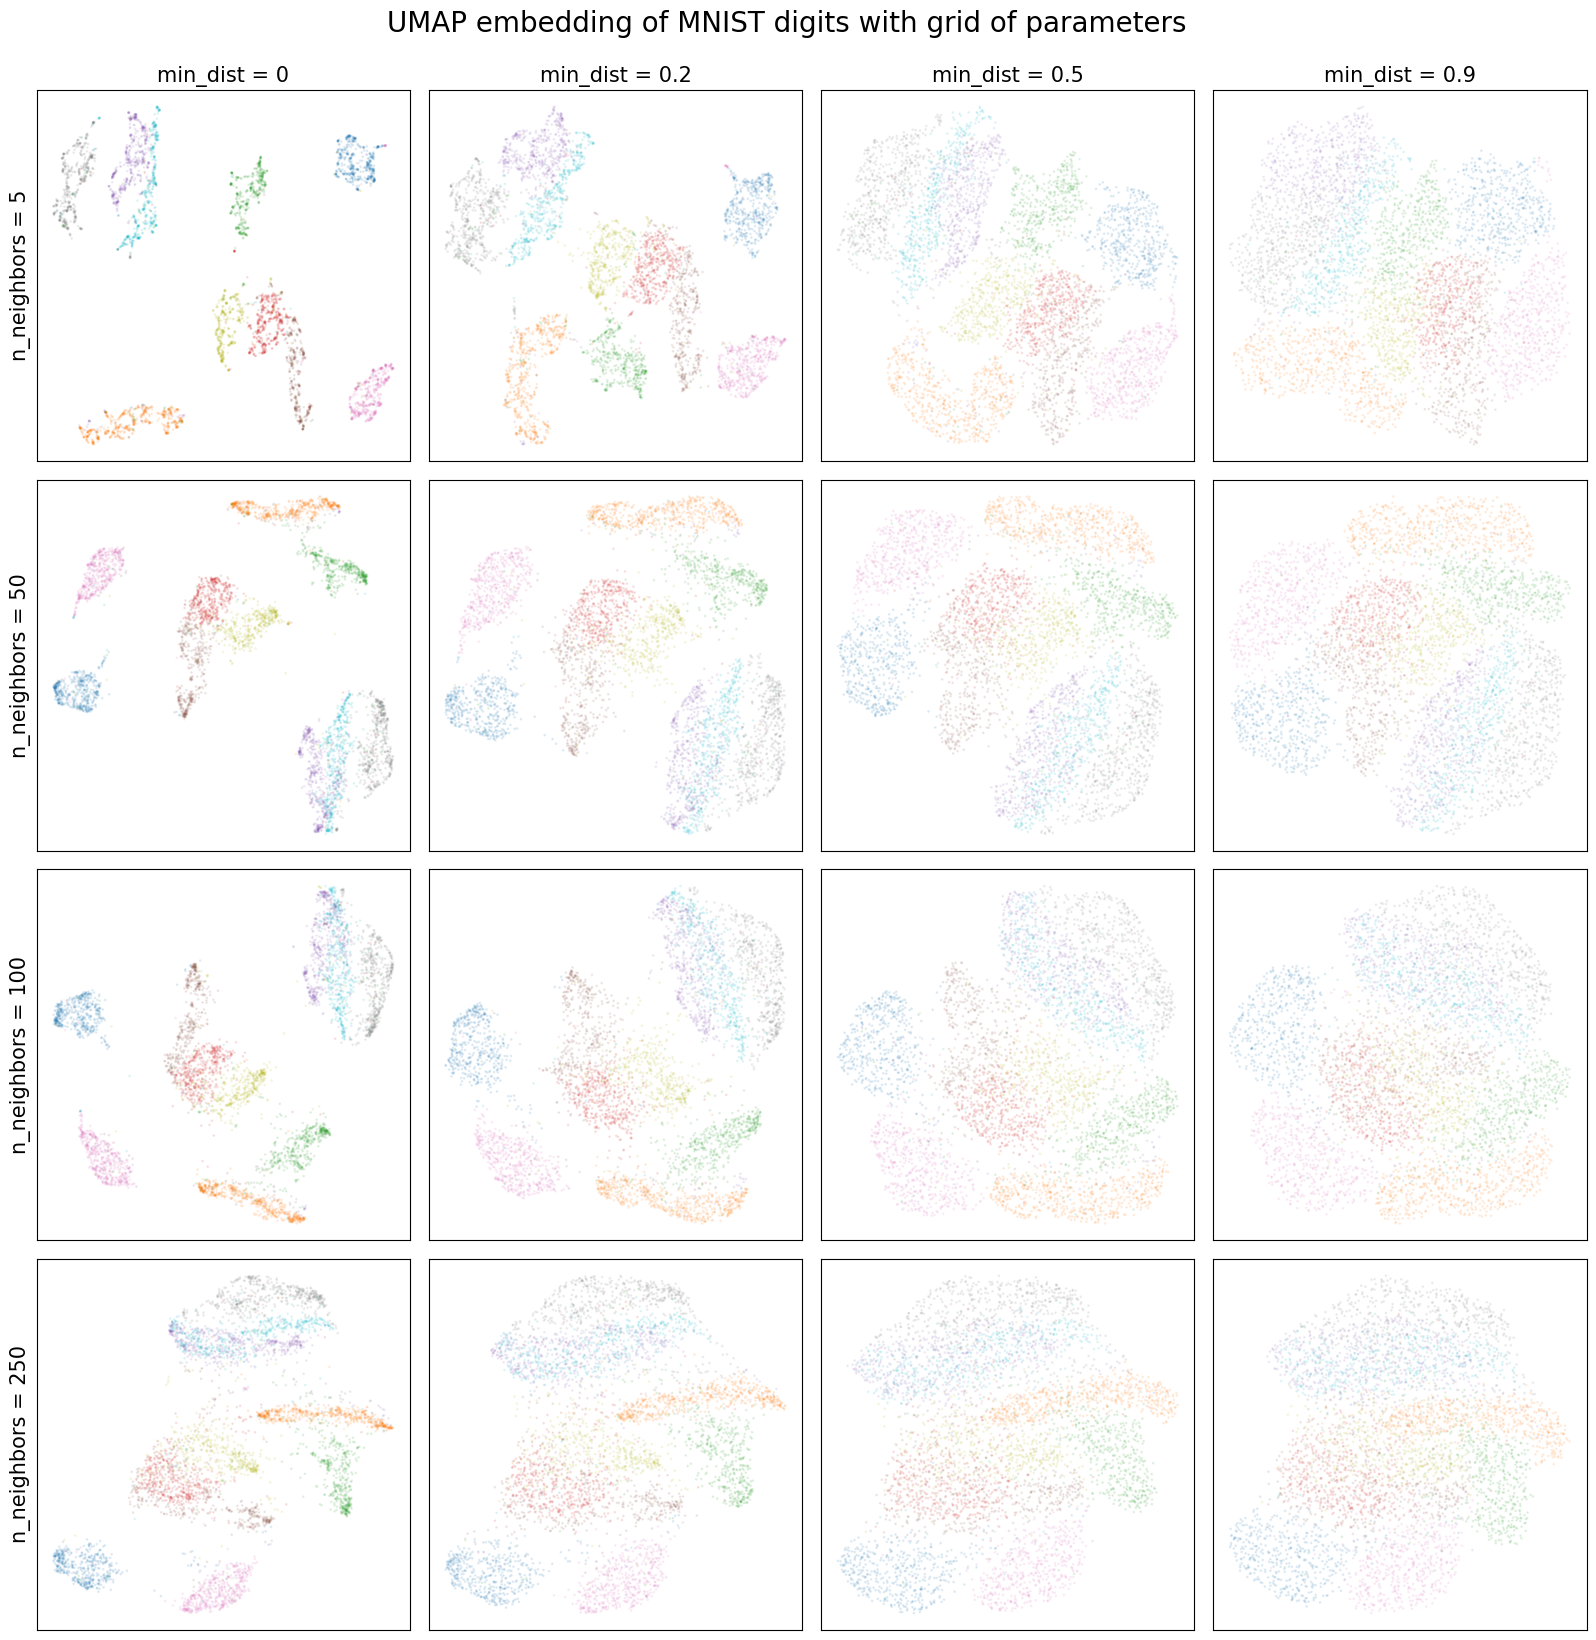

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        ax.scatter(precomputed_knn_embeddings[i, j, :, 0],
                   precomputed_knn_embeddings[i, j, :, 1],
                   c=labels / 9,
                   cmap='tab10',
                   alpha=0.1,
                   s=1,
                   )
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 0:
            ax.set_title("min_dist = {}".format(min_dists[j]), size=15)
        if j == 0:
            ax.set_ylabel("n_neighbors = {}".format(n_neighbors[i]), size=15)
fig.suptitle("UMAP embedding of MNIST digits with grid of parameters", y=0.92, size=20)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

WITH MY DATA

In [ ]:
# Pre-calculate embeddings
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("BAAI/bge-small-en")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Pre-reduce embeddings for visualization purposes
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(embeddings)